## Master 2 - MLDS - Paris Descartes 

## Projet Apprentissage Supervisé 
<em>le 15 janvier 2019 avant minuit</em>

<b><big>Lucas Iscovici <span style="float:right">Mohamed Ben Hamdoune</span></big></b>

## Le SUJET 
### Détection de fraude dans des transactions bancaires

### Objectif
L’objectif de ce travail est la mise en pratique concrète d’un certain nombre de techniques
d’apprentissage supervisé (<b>Bayesien Naïf, KNN, LDA, QDA, Linear SVM, Non Linear SVM,
Régression logistique, CART et Random Forest</b>), à travers l’étude d’un cas pratique nécessitant
l’utilisation de logiciels de traitement statistique de données <b>R ou python</b>.<br>L’application visée est :<br>
 <b>Détection de fraude dans des transactions bancaires</b> :<br> En résumé, il s’agit de travailler dans ce
projet sur une base de données décrivant des transactions bancaires sur une période donnée,
    l’objectif est la <b>détection des transactions frauduleuses</b>.<br>
    Je vous encourage à faire preuve d’<b>originalité</b> : vous pouvez très bien utiliser des modèles qui n’ont
pas été présentés au cours

### Travail à faire
Commencer par une <b>étude exploratoire</b> préliminaire<br>
Utiliser les différentes techniques de <b>classification supervisée</b> vue en cours pour créer un
<b>modèle de détection de la fraude</b>. Suivant les techniques utilisées (et les fonctions
disponibles sous R), vous pourrez utiliser l’ensemble des variables disponibles ou
uniquement les variables quantitatives, et réaliser ou non une <b>sélection de variables</b>.<br>
Comparer l’ensemble de ces techniques à l’aide de courbes ROC (<b>AUC</b>), évaluées soit par
<b>validation croisée</b> soit sur échantillon test

### Rapport
Le rapport du projet doit présenter de façon claire et concise:<br>
    l'<b>objet</b> de l'analyse<br>
    la <b>description des données</b> (individus/variables utilisées, variables supplémentaires etc.)<br>
    <b>l'analyse</b> proprement dite<br>
    les <b>commentaires sur les résultats</b> obtenus<br>
    

## L'ANALYSE 

### Les Données

Le jeu de données contient les<b> transactions effectuées par cartes de crédit en septembre 2013</b> par les titulaires de carte
européennes. <br>Cet ensemble de données présente les transactions qui se sont produites <b>en deux jours</b>, où nous avons eu
    <b>492 fraudes sur 284 807 transactions</b>.<br> L'ensemble de données est <b>très déséquilibré</b>, les classes <b>positives (fraudes)
    représentent 0,172%</b> de toutes les transactions.<br> Il contient uniquement des <b>variables d'entrée</b> numériques <b>résultant
    d'une transformation PCA</b>. Les caractéristiques <b>V1, V2, ... V28 sont les composantes principales obtenues avec PCA</b>,
les seules <b>caractéristiques qui n'ont pas été transformées avec PCA sont 'Time' et 'Amount'</b>.<br> La variable <b>'Time'</b>
    contient les <b>secondes écoulées entre chaque transaction et la première transaction</b> de l'ensemble de données. La
    variable <b>'Amount'</b> est le Montant de la transaction, cette caractéristique peut être utilisée pour <em>l'apprentissage sensible
    aux coûts</em> dépendant de l'exemple. La fonction <b>'Class'</b> est la variable de réponse et prend la valeur <b>1 en cas de fraude et
    0 sinon</b>. Compte tenu du rapport de <b>déséquilibre de classes</b>, nous recommandons de <b>mesurer la précision en utilisant
    l'aire sous la courbe de rappel de précision (<em>AUPRC</em>)</b>. La précision de la matrice de confusion n'est pas significative
pour une classification non équilibrée.

<h3>A Retenir: </h3>
- 2 jours de fraude 
    - Variable "Time"
       - Secondes -> voir si pattern temporel de fraude (matin ? soir?
- Fraude rare
    - Classe déséquilibré (492 fraudes sur 284 807 transactions) (0,172%)
        - AUPRC -> l'aire sous la courbe de rappel de précision
        - Attention au méthodes nécessitant des classes équilibré 
        - Voir d'éventuelle techniques pour lutter contre ce pb
- "Amount" -> voir si pattern avec la montant de la transaction pour la fraude
- Variables d'entrée sont les composantes principales d'une PCA
    - On ne peux pas capter le sens des composantes sans le nom des vrais variables ?
    - Ne "capture" que les liaisons linéaires
    - Revenir au données initiales ? à chercher mais pb visiblement si que pca pb?



### Convention

VOIR LES TODOS 

## IMPORT 

In [493]:
from pip import _internal as pip

from math import *
from collections import  Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns


from sklearn.metrics import precision_recall_curve,auc,roc_auc_score,confusion_matrix,classification_report,roc_curve
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,StratifiedKFold
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import scale

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.manifold import *

from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier, SGDClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier,VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC,LinearSVC

from sklearn.utils.linear_assignment_ import linear_assignment 

#help to find, missing, colinearity , etcc...
from feature_selector import FeatureSelector

from imblearn.over_sampling import SMOTE

import lightgbm as lgb

try:
    import scikitplot 
except:
    pip.main(["install","scikit-plot"])
    import scikitplot 
#USEFULL
from functools import partial
from tqdm import tqdm,tqdm_notebook

###  USEFULL

In [184]:
import warnings
warnings.filterwarnings('ignore')

In [185]:
T=True
F=False

In [289]:
pd.DataFrame.dropCol=lambda self,a:self.drop(a,axis=1)
pd.Series.whereDrop = lambda self,b: self.where(b).dropna() 
pd.DataFrame.appendCol=lambda self,name,value:pd.concat([self,pd.Series(value,name=name)],axis=1)

In [187]:
_make_cost_m=lambda cm:-cm + np.max(cm)
listToDict=lambda a:dict(zip(range(len(a)),a))
getTrueLabel=lambda a,b:pd.Series(b).map(dict(linear_assignment(_make_cost_m(confusion_matrix(b,a))))).values.tolist()

sklearn.metrics.classification_report <br>
Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.

In [211]:
def sensitivity_specificity(a,b):
    l=pd.DataFrame.from_dict(classification_report(a,b,output_dict=T))
    return pd.DataFrame.from_records(dict(sensitivity=[l.loc["recall","0"]],specificity=[l.loc["recall","1"]]))
#sensitivity_specificity([1,1,1,0],[1,1,1,1])

In [243]:
FRAUD=1
NO_FRAUD=0

## constitution du jeu

In [7]:
!ls data

creditcard.csv	    Projet_Apprentissage_Supervisé_1819.zip
creditcard.csv.zip  Projet_app_sup_MLDS1819_vf.pdf


In [272]:
data=pd.read_csv("./data/creditcard.csv")

In [273]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

## Train - TEST

On va des le debut separer le jeu de données pour ne pas biaser l'analyse, et les resultats des models

In [276]:
XTrain,XTest,YTrain,YTest=train_test_split(data.dropCol("Class"),
                                           data.Class,
                                          stratify=data.Class,
                                          random_state=42)

In [277]:
dataShape=XTrain.shape

In [278]:
variablePasPC = ["Time","Amount","Class"]

In [302]:
dataPC=XTrain.loc[:,~XTrain.columns.isin(variablePasPC)].appendCol("Class",YTrain)
dataPasPC=XTrain.loc[:,XTrain.columns.isin(variablePasPC)].appendCol("Class",YTrain)

##  EDA

####  V(PC) de la PCA

In [291]:
dataPC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213605 entries, 17884 to 17677
Data columns (total 29 columns):
V1       213605 non-null float64
V2       213605 non-null float64
V3       213605 non-null float64
V4       213605 non-null float64
V5       213605 non-null float64
V6       213605 non-null float64
V7       213605 non-null float64
V8       213605 non-null float64
V9       213605 non-null float64
V10      213605 non-null float64
V11      213605 non-null float64
V12      213605 non-null float64
V13      213605 non-null float64
V14      213605 non-null float64
V15      213605 non-null float64
V16      213605 non-null float64
V17      213605 non-null float64
V18      213605 non-null float64
V19      213605 non-null float64
V20      213605 non-null float64
V21      213605 non-null float64
V22      213605 non-null float64
V23      213605 non-null float64
V24      213605 non-null float64
V25      213605 non-null float64
V26      213605 non-null float64
V27      213605 non-null flo

Comme Pc -> que des float, et pas de missing data

In [292]:
minmaxavg=lambda x:x.agg([min,max,"mean"])

In [293]:
stdMinMaxPC=minmaxavg(dataPC.std())
stdMinMaxPC

min     0.041527
max     1.961714
mean    0.944441
dtype: float64

In [294]:
minMinMaxPC=minmaxavg(dataPC.min())
minMinMaxPC

min    -113.743307
max       0.000000
mean    -27.090506
dtype: float64

In [295]:
maxMinMaxPC=minmaxavg(dataPC.max())
maxMinMaxPC

min       1.000000
max     120.589494
mean     20.766596
dtype: float64

In [296]:
minmaxavgPCA=pd.concat([stdMinMaxPC,minMinMaxPC,maxMinMaxPC],axis=1,keys=["std","min","max"])
minmaxavgPCA

,std,min,max
min,0.041527,-113.743307,1.000000
max,1.961714,0.000000,120.589494
mean,0.944441,-27.090506,20.766596


ratio std - max - min  :

In [297]:
ratio=lambda a:a.max()/a.min()
minmaxRatio=minmaxavgPCA.append(
    pd.Series(list(map(ratio,[stdMinMaxPC,minMinMaxPC,maxMinMaxPC])),
              index=["std","min","max"],
              name="Ratio")
)
minmaxRatio

,std,min,max
min,0.041527,-113.743307,1.000000
max,1.961714,0.000000,120.589494
mean,0.944441,-27.090506,20.766596
Ratio,47.239219,-0.000000,120.589494


### TODO:
VOIR si scale les PC <br>

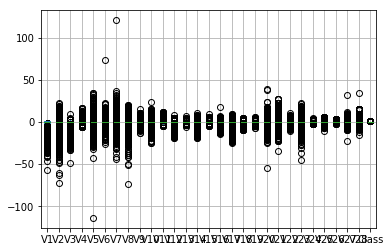

In [298]:
dataPC.boxplot()

un peu d'outlier A voir peux etre rapport avec fraudes

#### TIME-AMOUNT-CLASS

In [299]:
dataPasPC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213605 entries, 17884 to 17677
Data columns (total 2 columns):
Time      213605 non-null float64
Amount    213605 non-null float64
dtypes: float64(2)
memory usage: 4.9 MB


Time et Amount Float a part Class int (binaire) 

On va inverser les classes <br>
0 -> 1  <br>
1 -> 0 <br>
(Pour des questions de metrics (confusions MAtrix sensitivity and specitivity)

In [303]:
dataClass=dataPasPC.Class

In [304]:
dataClass=dataClass.map({0:NO_FRAUD,1:FRAUD})

In [305]:
dataPasPcClass = dataPasPC[["Amount","Time"]]

In [306]:
dataPasPcClass.describe()

,Amount,Time
count,213605.000000,213605.000000
mean,88.216558,94891.076361
std,250.522258,47490.486692
min,0.000000,0.000000
25%,5.640000,54234.000000
50%,22.000000,84794.000000
75%,77.500000,139372.000000
max,25691.160000,172792.000000


### TODO:
std tres different (250 - 47500) ( X 190) -> scale <br>std tres different des PC (1) ( X 250 , X 47000)-> scale

In [307]:
dataClass_vc=dataClass.value_counts

In [308]:
dataClass_vcDF=pd.concat([dataClass_vc(),dataClass_vc(normalize=T)],
                         axis=1,
                         keys=["Class","Class (normalize)"]
                        )
dataClass_vcDF

,Class,Class (normalize)
0,213236,0.998273
1,369,0.001727


Comme prevu tres déséquilibré

Si on met que la classe 0 (donc pas de fraude) on a 99.8 % d'accuracy

#### DUMMY

In [310]:
baseline_dummy=dataClass_vcDF.iloc[0,1]
baseline_dummy

0.99827251234755743

##### AUC
Si on fait AUPRC <a href="https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/">Why ?</a>

In [350]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
#AUCPR -> dOIT ETRE UTILISÉ SI classe déséquilibré
def AUCPRC(testy, probs,plot=F,withAUC=F,withACC=F,withSS=F):
    '''
    AUCPRC(
        true_labels [n_samples] ,
        probas [n_samples] ou decision function,
        plot=F
    )
    '''
    precision, recall, thresholds = precision_recall_curve(testy, probs)
    if plot:
        plt.plot([0, 1], [0.1, 0.1], linestyle='--')
        # plot the roc curve for the model
        plt.plot(recall, precision, marker='.')
        # show the plot
        plt.show()
    res = [("aucprc",auc(recall,precision))]
    if withAUC:
        res+=[("auc",roc_auc_score(testy, probs))]
    if withACC:
        cm=confusion_matrix(testy, probs)
        res+=[("acc",max(sum(np.diag(cm)),sum(np.diag(cm[::-1])))/np.sum(cm))]
    if withSS:
        ss=sensitivity_specificity(testy,probs)
        res+=list(zip(ss.columns.tolist(),ss.values.tolist()[0]))
    return res

In [351]:
metrics=lambda a,b:AUCPRC(a,b,withACC=T,withAUC=T,withSS=T)

In [352]:
dummyClass=[FRAUD]*dataShape[0]

In [353]:
metricsDummy=metrics(dataClass,dummyClass)
metricsDummy

[('aucprc', 0.50086374382622134),
 ('auc', 0.5),
 ('acc', 0.99827251234755743),
 ('sensitivity', 0.0),
 ('specificity', 1.0)]

pour l'instant quasiment pareil AUC ET AUCPRC 

In [354]:
baselineAUCPRC=metricsDummy[0][1]
baselineAUCPRC

0.50086374382622134

In [355]:
dummyMetrics=pd.DataFrame.from_records(metricsDummy,columns=["metrics","Dummy"],index="metrics").T
dummyMetrics

metrics,aucprc,auc,acc,sensitivity,specificity
Dummy,0.500864,0.5,0.998273,0.0,1.0


### Scale

In [367]:
_dataScale = scale(XTrain)

In [368]:
dataScale=pd.DataFrame(_dataScale,columns=XTrain.columns)

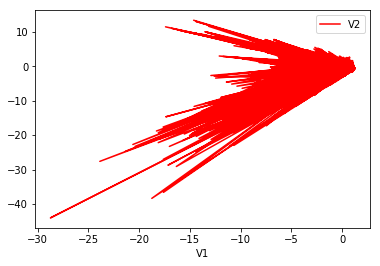

In [369]:
dataScale.plot("V1","V2",color=dataClass.map({0:"red",1:"blue"}).tolist());

on voit pas la fraude pas de blue

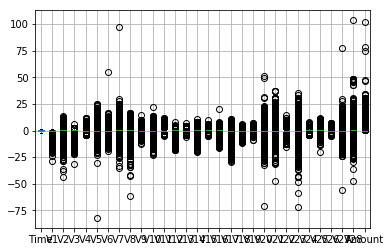

In [370]:
dataScale.boxplot()

"bcp d'outlier"

Check Missing, Collinear, and more With FeatureSelector Pkg [more ? ](https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0)

In [482]:
fsDataScale = FeatureSelector(data = dataScale, labels=YTrain)

In [408]:
fsDataScale.identify_missing(missing_threshold=0)

0 features with greater than 0.00 missing values.



In [385]:
fsDataScale.identify_single_unique()

0 features with a single unique value.



On va mettre 0.8 [Why ?](https://medium.com/@Saslow/collinearity-what-it-means-why-its-bad-and-how-does-it-affect-other-models-94e1db984168)

In [425]:
fsDataScale.identify_collinear(correlation_threshold=0.8)
#fsDataScale.plot_collinear()

0 features with a correlation magnitude greater than 0.80.



 finds features that have zero importance according to a gradient boosting machine (GBM)

### TODO
Comme ce sont des données pas equilibrés, on dois faire la feature selection en meme temps que le cv ([why?](http://www.alfredo.motta.name/cross-validation-done-wrong/)) (ptretre faire comme featureSelector [how ? ](https://github.com/WillKoehrsen/feature-selector/blob/c3943e547d0d43f4d3d41b8eb72c9aad26a1b2eb/feature_selector/feature_selector.py#L229) )

je vais faire l'oversampling de la classe minoritaire Dans la cross Validation pour avoir des featues importance <br>
[why ?](http://www.alfredo.motta.name/cross-validation-done-wrong/)

In [507]:
aucprc=lambda y_true, y_pred:tuple(list(AUCPRC(y_true,y_pred)[0])+[T])

on va reperer les bonnes/mauvaise features avec du gradient boosting (Descente Du gradient + Boosting (plusieurs arbres "faibles" combinner (ponderé) ))

In [522]:
def identify_feat_imp(self,n_splits=10):
    data=self.data
    dataClass=self.labels
    skf=StratifiedKFold(n_splits=n_splits,random_state=42,shuffle=T)
    feature_names=list(data.columns)
    feature_importance_values = np.zeros(len(feature_names))
    scores = np.zeros(n_splits)
    for i,(train_index, test_index) in enumerate(skf.split(data, dataClass)):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = dataClass.iloc[train_index], dataClass.iloc[test_index]
        sm = SMOTE()
        X, y = sm.fit_sample(X_train, y_train)
        model = lgb.LGBMClassifier(n_estimators=500, learning_rate = 0.05, verbose = 1,n_jobs=-1)
        model.fit(X, y, eval_metric = aucprc,
                          eval_set = [(X_test, y_test)],
                          early_stopping_rounds = 10, verbose = 1)
        #POUR LGBMClassif VOIR TODO : 
        #voir importance_type (string, optional (default='split')) 
        #– The type of feature importance to be filled into feature_importances_.
        #If ‘split’, result contains numbers of times the feature is used in a model. 
        #If ‘gain’, result contains total gains of splits which use the feature.
        scores[i]=AUCPRC(y_test,model.predict(X_test))[0][1]
        feature_importance_values += model.feature_importances_ / n_splits
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

    # Sort features according to importance
    feature_importances = feature_importances.sort_values('importance', ascending = False).reset_index(drop = True)

    # Normalize the feature importances to add up to one
    feature_importances['normalized_importance'] = feature_importances['importance'] / feature_importances['importance'].sum()
    feature_importances['cumulative_importance'] = np.cumsum(feature_importances['normalized_importance'])

    # Extract the features with zero importance
    record_zero_importance = feature_importances[feature_importances['importance'] == 0.0]

    to_drop = list(record_zero_importance['feature'])
    self.feature_importances = feature_importances
    self.record_zero_importance = record_zero_importance
    self.ops['zero_importance'] = to_drop
    self.scores=scores
    print('\n%d features with zero importance after one-hot encoding.\n' % len(self.ops['zero_importance']))

In [523]:
FeatureSelector.identify_feat_imp=identify_feat_imp

In [524]:
#/!\ "LONG"
#fsDataScale.identify_feat_imp()

[1]	valid_0's binary_logloss: 0.649029	valid_0's aucprc: 0.67549
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.609047	valid_0's aucprc: 0.686269
[3]	valid_0's binary_logloss: 0.572707	valid_0's aucprc: 0.687124
[4]	valid_0's binary_logloss: 0.539426	valid_0's aucprc: 0.687366
[5]	valid_0's binary_logloss: 0.508694	valid_0's aucprc: 0.713251
[6]	valid_0's binary_logloss: 0.480342	valid_0's aucprc: 0.714085
[7]	valid_0's binary_logloss: 0.454159	valid_0's aucprc: 0.71361
[8]	valid_0's binary_logloss: 0.42988	valid_0's aucprc: 0.713301
[9]	valid_0's binary_logloss: 0.407353	valid_0's aucprc: 0.713111
[10]	valid_0's binary_logloss: 0.38646	valid_0's aucprc: 0.712983
[11]	valid_0's binary_logloss: 0.367037	valid_0's aucprc: 0.712825
[12]	valid_0's binary_logloss: 0.348817	valid_0's aucprc: 0.719502
[13]	valid_0's binary_logloss: 0.331675	valid_0's aucprc: 0.802991
[14]	valid_0's binary_logloss: 0.315662	valid_0's aucprc: 0.803219
[15]	valid_0'

[26]	valid_0's binary_logloss: 0.182408	valid_0's aucprc: 0.6996
[27]	valid_0's binary_logloss: 0.174847	valid_0's aucprc: 0.719212
[28]	valid_0's binary_logloss: 0.167803	valid_0's aucprc: 0.719336
[29]	valid_0's binary_logloss: 0.160903	valid_0's aucprc: 0.718967
[30]	valid_0's binary_logloss: 0.154527	valid_0's aucprc: 0.722953
[31]	valid_0's binary_logloss: 0.148473	valid_0's aucprc: 0.724803
[32]	valid_0's binary_logloss: 0.142626	valid_0's aucprc: 0.724207
[33]	valid_0's binary_logloss: 0.137112	valid_0's aucprc: 0.72417
[34]	valid_0's binary_logloss: 0.131876	valid_0's aucprc: 0.724234
[35]	valid_0's binary_logloss: 0.127025	valid_0's aucprc: 0.723282
[36]	valid_0's binary_logloss: 0.12232	valid_0's aucprc: 0.723017
[37]	valid_0's binary_logloss: 0.117749	valid_0's aucprc: 0.723173
[38]	valid_0's binary_logloss: 0.113469	valid_0's aucprc: 0.72137
[39]	valid_0's binary_logloss: 0.109478	valid_0's aucprc: 0.720929
[40]	valid_0's binary_logloss: 0.105533	valid_0's aucprc: 0.721055


[23]	valid_0's binary_logloss: 0.211666	valid_0's aucprc: 0.749112
[24]	valid_0's binary_logloss: 0.20297	valid_0's aucprc: 0.778934
[25]	valid_0's binary_logloss: 0.194421	valid_0's aucprc: 0.77524
[26]	valid_0's binary_logloss: 0.186718	valid_0's aucprc: 0.774577
[27]	valid_0's binary_logloss: 0.179372	valid_0's aucprc: 0.773984
[28]	valid_0's binary_logloss: 0.17231	valid_0's aucprc: 0.773755
[29]	valid_0's binary_logloss: 0.165563	valid_0's aucprc: 0.772234
[30]	valid_0's binary_logloss: 0.159165	valid_0's aucprc: 0.769496
[31]	valid_0's binary_logloss: 0.153101	valid_0's aucprc: 0.769626
[32]	valid_0's binary_logloss: 0.147242	valid_0's aucprc: 0.770914
[33]	valid_0's binary_logloss: 0.141747	valid_0's aucprc: 0.771645
[34]	valid_0's binary_logloss: 0.136481	valid_0's aucprc: 0.784044
[35]	valid_0's binary_logloss: 0.131558	valid_0's aucprc: 0.786293
[36]	valid_0's binary_logloss: 0.126708	valid_0's aucprc: 0.785978
[37]	valid_0's binary_logloss: 0.122155	valid_0's aucprc: 0.78605

[45]	valid_0's binary_logloss: 0.0902165	valid_0's aucprc: 0.759308
[46]	valid_0's binary_logloss: 0.0872584	valid_0's aucprc: 0.759767
[47]	valid_0's binary_logloss: 0.0844573	valid_0's aucprc: 0.758776
[48]	valid_0's binary_logloss: 0.0817018	valid_0's aucprc: 0.755538
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.114899	valid_0's aucprc: 0.766418
[1]	valid_0's binary_logloss: 0.649436	valid_0's aucprc: 0.721443
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.609819	valid_0's aucprc: 0.721535
[3]	valid_0's binary_logloss: 0.573543	valid_0's aucprc: 0.784598
[4]	valid_0's binary_logloss: 0.540203	valid_0's aucprc: 0.786156
[5]	valid_0's binary_logloss: 0.509756	valid_0's aucprc: 0.786152
[6]	valid_0's binary_logloss: 0.481618	valid_0's aucprc: 0.787327
[7]	valid_0's binary_logloss: 0.455739	valid_0's aucprc: 0.795424
[8]	valid_0's binary_logloss: 0.431659	valid_0's aucprc: 0.795976
[9]	valid_0's binary_logloss: 0.4091

[45]	valid_0's binary_logloss: 0.0887592	valid_0's aucprc: 0.768
[46]	valid_0's binary_logloss: 0.0859045	valid_0's aucprc: 0.768277
[47]	valid_0's binary_logloss: 0.0829355	valid_0's aucprc: 0.769078
[48]	valid_0's binary_logloss: 0.0802843	valid_0's aucprc: 0.769167
[49]	valid_0's binary_logloss: 0.0776609	valid_0's aucprc: 0.769789
[50]	valid_0's binary_logloss: 0.0750676	valid_0's aucprc: 0.77053
[51]	valid_0's binary_logloss: 0.072539	valid_0's aucprc: 0.771632
[52]	valid_0's binary_logloss: 0.0702278	valid_0's aucprc: 0.771267
[53]	valid_0's binary_logloss: 0.0680022	valid_0's aucprc: 0.772108
[54]	valid_0's binary_logloss: 0.0659155	valid_0's aucprc: 0.772878
[55]	valid_0's binary_logloss: 0.0638471	valid_0's aucprc: 0.772886
[56]	valid_0's binary_logloss: 0.0618216	valid_0's aucprc: 0.773665
[57]	valid_0's binary_logloss: 0.0599307	valid_0's aucprc: 0.774294
[58]	valid_0's binary_logloss: 0.0581317	valid_0's aucprc: 0.77545
[59]	valid_0's binary_logloss: 0.0563565	valid_0's auc

zero feath with 0 

In [534]:
fsDataScale.identify_low_importance(0.95)

26 features required for cumulative importance of 0.95 after one hot encoding.
4 features do not contribute to cumulative importance of 0.95.



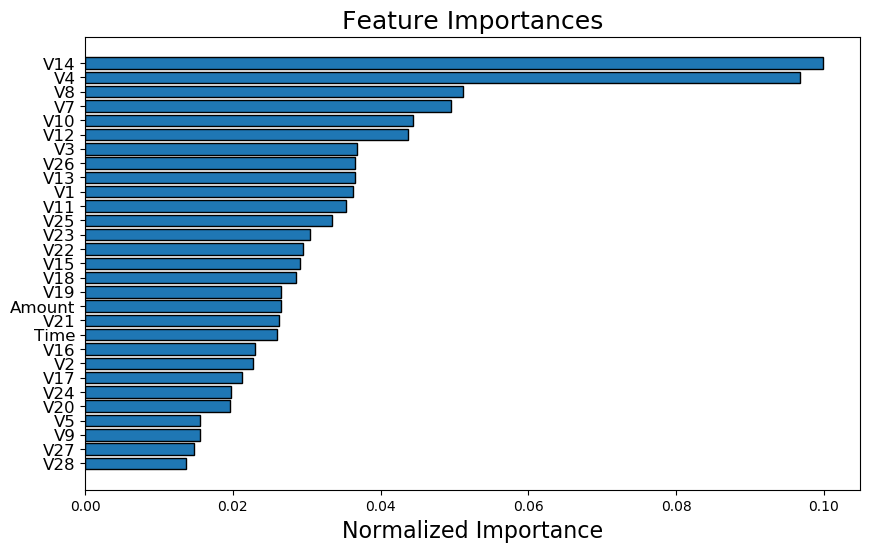

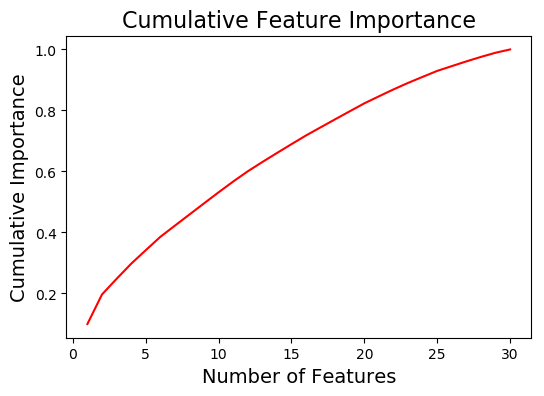

In [533]:
fsDataScale.plot_feature_importances(plot_n=300)

In [537]:
max(fsDataScale.scores)

0.57596096592296187

"bonne features "

In [541]:
fsDataScale.feature_importances.sort_values("importance",ascending=F)[:5]

,feature,importance,normalized_importance,cumulative_importance
0,V14,128.6,0.099922,0.099922
1,V4,124.6,0.096814,0.196737
2,V8,65.9,0.051204,0.247941
3,V7,63.7,0.049495,0.297436
4,V10,57.1,0.044367,0.341803


"bad feat"

In [543]:
fsDataScale.feature_importances.sort_values("importance",ascending=T)[:5]

,feature,importance,normalized_importance,cumulative_importance
29,V6,13.9,0.010800,1.000000
28,V28,17.5,0.013598,0.989200
27,V27,18.9,0.014685,0.975602
26,V9,20.0,0.015540,0.960917
25,V5,20.1,0.015618,0.945377


#### Etude Corr avec class

corr between binary and continious -> pearsonr [Why ?](https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365)

Cor pearson Asumption: absence of outliers, normality of variables, linearity, and homoscedasticity.

In [432]:
def criticalCorr(n,alpha=0.05):
    df=n-2
    t=scipy.stats.t.ppf([alpha/2],df)[0];
    t2=t**2
    st2=sqrt(t2)
    return st2/sqrt(t2+df)

look at corr and p_value (we want p_value < 0.05)

In [449]:
def plotCorr(data,dataClass,corr=scipy.stats.pearsonr):
    corrD=data.apply(lambda a:corr(dataClass,a)[0]).abs()
    pValue=data.apply(lambda a:corr(dataClass,a)[1])
    plt.matshow([corrD.values])
    plt.yticks([0],["Class"])
    plt.colorbar()
    plt.xticks(range(data.shape[1]),data.columns,rotation=60,ha="left");
    plt.matshow([pValue.values])
    plt.yticks([0],["p_value"])
    plt.colorbar()
    plt.xticks(range(data.shape[1]),data.columns,rotation=60,ha="left");
    return (corrD,pValue)

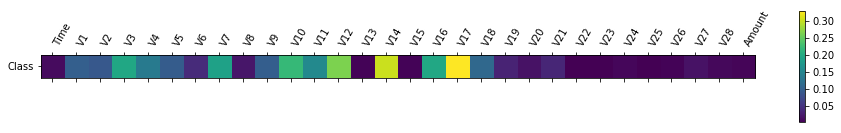

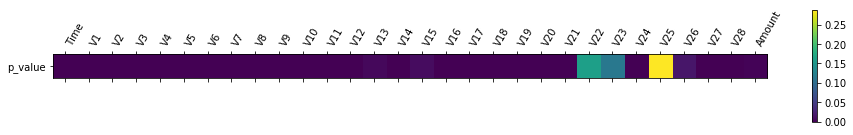

In [450]:
#https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365
corrD,pValue=plotCorr(dataScale,dataClass)

In [451]:
seuilCriticalCor=criticalCorr(dataShape[0])
print("seuil critique pour {} est: r={:.3f}".format(dataShape[0],seuilCriticalCor))

seuil critique pour 213605 est: r=0.004


Les correlations significatives sont:

In [452]:
corrD.sort_values(ascending=F).abs().whereDrop(lambda a:a>seuilCriticalCor)[:5]

V17    0.330414
V14    0.303963
V12    0.266206
V10    0.222506
V16    0.199069
dtype: float64

Les pValues n'indiquant pas de correlation significative sont:

In [453]:
pValue.whereDrop(lambda a:a>0.05)

V22    0.161416
V23    0.114773
V25    0.286897
dtype: float64

Confirmé par :

In [454]:
corrD.whereDrop(lambda a:a<seuilCriticalCor)

V22    0.003030
V23    0.003412
V25    0.002304
dtype: float64

Les variables les plus correlées aux classes sont: V14, V17,V12,V16

#### Spearman

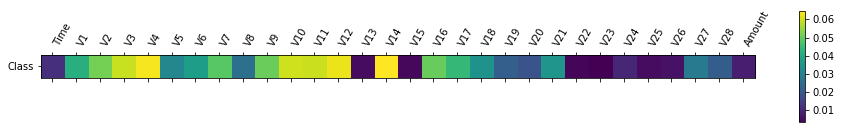

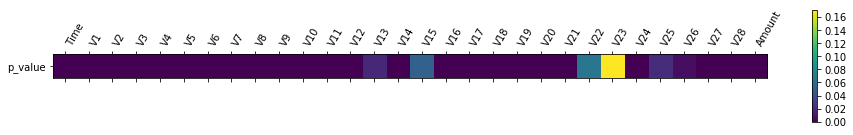

In [455]:
#https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365
corrD,pValue=plotCorr(dataScale,dataClass,scipy.stats.spearmanr)

In [460]:
corrD.abs().sort_values(ascending=F)[:5]

V14    0.064867
V4     0.064122
V12    0.063023
V10    0.060432
V11    0.059965
dtype: float64

In [464]:
pValue[pValue>0.05].sort_values(ascending=F)

V23    0.170282
V22    0.067181
V15    0.053019
dtype: float64

pas de correlation pour spearman élevé mais confirm que V22,15,13 est vrmt pas correllé

#### tau kendall

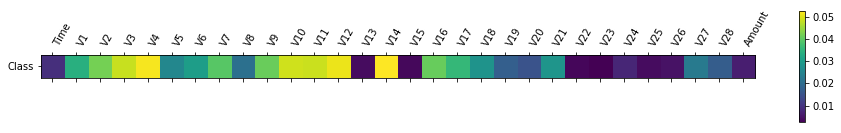

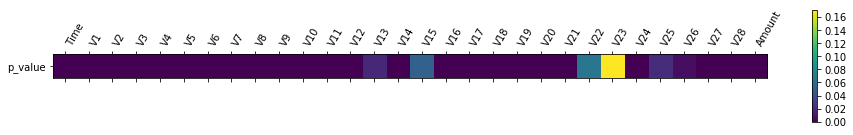

In [466]:
#https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365
corrD,pValue=plotCorr(dataScale,dataClass,scipy.stats.kendalltau)

In [468]:
corrD.abs().sort_values(ascending=F)[:5]

V14    0.052964
V4     0.052356
V12    0.051458
V10    0.049343
V11    0.048962
dtype: float64

In [467]:
pValue[pValue>0.05].sort_values(ascending=F)

V23    0.170282
V22    0.067181
V15    0.053019
dtype: float64

pas de correlation elevé pour kendall mais confirme que V22,15,13 est vrmt pas correllé

### TODO
supprimer V22,V23, V25 ?

### Etude Amount et Time

Amount

Text(0.5,1,'Fraud')

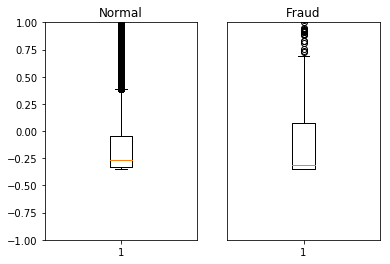

In [43]:
fig,ax=plt.subplots(1,2)
ax[0].boxplot(dataScale["Amount"][dataClass==0]);
ax[0].set_ylim([-1,1])
ax[0].set_title("Normal")
ax[1].boxplot(dataScale["Amount"][dataClass==1]);
ax[1].set_ylim([-1,1]);
ax[1].set_yticks([])
ax[1].set_title("Fraud")

retour au données initiale

In [44]:
data.Amount.groupby(dataClass).describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


On remarque que Amount a 75% est plus grand, ainsi quand mean<br>
il y a bcp d'outlier

Time

Text(0.5,1,'Fraud')

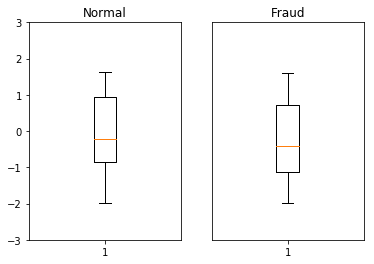

In [45]:
fig,ax=plt.subplots(1,2)
ax[0].boxplot(dataScale["Time"][dataClass==0]);
ax[0].set_ylim([-3,3])
ax[0].set_title("Normal")
ax[1].boxplot(dataScale["Time"][dataClass==1]);
ax[1].set_ylim([-3,3]);
ax[1].set_yticks([])
ax[1].set_title("Fraud")

In [46]:
data.Time.groupby(dataClass).describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,94838.202258,47484.015786,0.0,54230.0,84711.0,139333.0,172792.0
1,492.0,80746.806911,47835.365138,406.0,41241.5,75568.5,128483.0,170348.0


on veux pas grand chose

Creation d'un variable "Periode" -> toutes les 4h 

In [47]:
dataScale2=pd.concat([pd.Series(scale(data.Time%(60.*60.*4)),name="Period"),dataScale],axis=1)

In [48]:
dataScale2.Period.corr(dataClass)

0.0081384271770936628

0.0081384271770936628 > 0.004 Du coup corr significative

### PREMIER MODEL

##### split

In [234]:
trainx,testx,trainy,testy = train_test_split(dataScale2,dataClass,stratify=dataClass, random_state=42)

# VERSION PIPELINE

In [239]:
def pipelineLaunch(trainx,testx,trainy,testy):
    #LinearSVC,SVC -> long
    #penser a n_jobs=-1
    #ou autre solutions parralell
    algo=[\
        LogisticRegression(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis(),
          GaussianNB(),
         #KNeighborsClassifier()
          #LinearSVC(),
         # SVC(),
         DecisionTreeClassifier(),
         RandomForestClassifier()
        ]
    z=pd.DataFrame()
    for i in tqdm(algo):
        i.fit(trainx,trainy)
        testP=i.predict(testx)
        trainP=i.predict(trainx)
        metricTrain=metrics(trainy,trainP)
        metrixTest=metrics(testy,testP)
        z=z.append(
            pd.DataFrame.from_records([("type","train")]+metricTrain,
                                      columns=["metrics",repr(i.__class__).split(".")[-1][:-2]],
                                      index="metrics").T
        ).append(
            pd.DataFrame.from_records([("type","test")]+metrixTest,
                                      columns=["metrics",repr(i.__class__).split(".")[-1][:-2]],
                                      index="metrics").T
        )
    return (z,algo)
        

In [240]:
res=pipelineLaunch(trainx,testx,trainy,testy) #LinearSVC,SVC,knn -> long ()

100%|██████████| 6/6 [00:49<00:00,  8.19s/it]


In [241]:
r=res[0]
#r

In [242]:
resTab=r.reset_index().set_index(["index","type"])
#.stack().to_frame(name="value")
resTab

metrics                                aucprc       auc       acc
index                         type                               
LogisticRegression            train  0.766936   0.82107  0.999246
                              test   0.731495  0.808845  0.999143
LinearDiscriminantAnalysis    train  0.817112   0.87931  0.999396
                              test   0.798247   0.88198  0.999326
QuadraticDiscriminantAnalysis train  0.472622  0.929286  0.977646
                              test   0.458412  0.915827  0.977782
GaussianNB                    train  0.447138    0.9051  0.977969
                              test   0.440464  0.899335  0.977262
DecisionTreeClassifier        train         1         1         1
                              test   0.710158  0.841252  0.999031
RandomForestClassifier        train  0.971594  0.971545  0.999902
                              test   0.861909  0.882086  0.999537

Decision TRee et Random Forrest->gros surapprentissage

GaussianNB et QuadraticDiscriminantAnalysis  -> a ameliorer ou enlever

LogisticRegression	et LinearDiscriminantAnalysis -> a ameliorer si possinle

### TODO
appliquer des tech pour umbalance classe (SMOTE, ROSE, etc) 
[more ?](https://shiring.github.io/machine_learning/2017/04/02/unbalanced)

# VERSION SEQUENTIEL (mieux expliqué)

###  Regression Logistique + Selection de Variable

observations to be independent of each other.
no multicollinearity among the independent variables
[why?](https://www.statisticssolutions.com/assumptions-of-logistic-regression/)

In [88]:
repr(RegLog.__class__).split(".")[-1]

NameError: name 'RegLog' is not defined

In [89]:
RegLog=LogisticRegression(C=10,n_jobs=-1,penalty="l1").fit(trainx,trainy)
RegLog.fit(trainx,trainy)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
metrics(trainy,RegLog.predict(trainx))

[('aucprc', 0.75900228125729063),
 ('auc', 0.81564781258685048),
 ('acc', 0.99922286463331855)]

In [91]:
metrics(testy,RegLog.predict(testx))

[('aucprc', 0.75113360145596808),
 ('auc', 0.80887274516606222),
 ('acc', 0.99919946068930643)]

In [92]:
dummyMetrics2=dummyMetrics.append(
    pd.DataFrame.from_records(metrics(testy,RegLog.predict(testx)),columns=["metrics","LogReg"],index="metrics").T
)
dummyMetrics2

metrics,aucprc,auc,acc
Dummy,0.500864,0.500000,0.998273
LogReg,0.751134,0.808873,0.999199


pb test meilleur que train (surapprentissage) malgres le changement de C | peut etre faire cv 

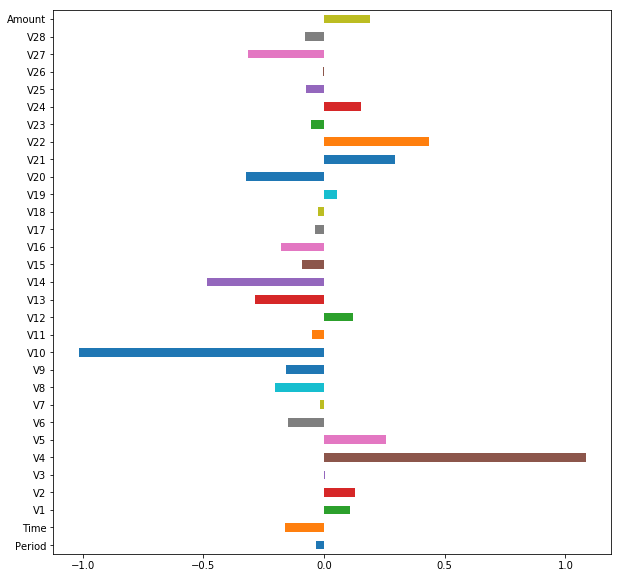

In [158]:
pd.Series(RegLog.coef_[0],index=dataScale2.columns).plot.barh(figsize=(10,10));
plt.yticks(rotation=0);

In [159]:
pd.Series(RegLog.coef_[0],index=dataScale2.columns).abs().sort_values(ascending=F)[:6]

V4     1.085200
V10    1.017194
V14    0.483930
V22    0.432999
V20    0.324574
V27    0.313734
dtype: float64

Les variables les plus correlées aux classes sont: (V4, V10), V14, V22, V20, V27

In [80]:
search=np.append(np.arange(0.01,0.1,0.01),(np.arange(0.1,1,0.2)))
logRegFit=lambda c,:LogisticRegression(C=c).fit(trainx,trainy)
def logRegPred(c): l=logRegFit(c);return (AUCPRC(trainy,l.predict(trainx))[0][1],AUCPRC(testy,l.predict(testx))[0][1])
#grid=[logRegPred(i) for i in tqdm(search)]


100%|██████████████████████████████████████████████████████████████| 14/14 [01:09<00:00,  5.00s/it]


In [96]:
#plt.plot(range(len(search)),np.array(grid)[:,0])
#plt.plot(range(len(search)),np.array(grid)[:,1])
#plt.xticks(range(len(search)),np.round(search,3).astype("str"));

### TODO: 
Selection des meilleurs variable<br>
Les combiner (polynome)

### LDA 
normality, same variance each variable (peux etre lié modele de melange, vu que minimise le ratio S_W/S_B) <br>
[more?](https://machinelearningmastery.com/linear-discriminant-analysis-for-machine-learning/)

### TODO: 
have to check normality<br>

In [57]:
ldaDataScale=LinearDiscriminantAnalysis()
dataScaleLDA=ldaDataScale.fit_transform(trainx,trainy)

In [58]:
ldaPredict = ldaDataScale.predict(testx)

In [59]:
metrics(trainy,ldaDataScale.predict(trainx))

[('aucprc', 0.81327248758332227),
 ('auc', 0.88065563551581794),
 ('acc', 0.99938203693733763)]

In [60]:
metrics(testy,ldaDataScale.predict(testx))

[('aucprc', 0.82286593628714744),
 ('auc', 0.8901383860417762),
 ('acc', 0.99941012892896264)]

In [200]:
dummyMetrics3=dummyMetrics2.append(
    pd.DataFrame.from_records(metrics(testy,ldaPredict),columns=["metrics","LDA"],index="metrics").T
)
dummyMetrics3

metrics,aucprc,auc,acc
Dummy,0.500864,0.500000,0.998273
LogReg,0.779563,0.829205,0.999284
LDA,0.822866,0.890138,0.999410


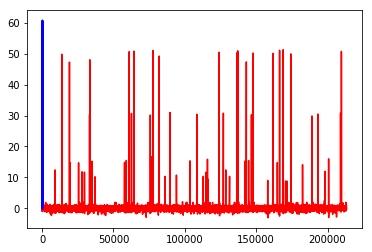

In [62]:
plt.plot(dataScaleLDA[trainy==0],color="red")
plt.plot(dataScaleLDA[trainy!=0],color="blue")

juste avec lda on est à 0.80 >> 0.5

### QDA
Each class uses its own estimate of variance (or covariance when there are multiple input variables).<br>
[more ?](http://uc-r.github.io/discriminant_analysis)

In [172]:
QdaDataScale=QuadraticDiscriminantAnalysis()
QdaDataScale.fit(trainx,trainy)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [173]:
QdaPredict = QdaDataScale.predict(testx)

In [174]:
metrics(trainy,QdaDataScale.predict(trainx))

[('aucprc', 0.46189347065313913),
 ('auc', 0.91956648437312938),
 ('acc', 0.97714472975819855)]

In [175]:
metrics(testy,QdaDataScale.predict(testx))

[('aucprc', 0.47924110724670493),
 ('auc', 0.93583607933323243),
 ('acc', 0.97721974101851072)]

In [201]:
dummyMetrics4=dummyMetrics3.append(
    pd.DataFrame.from_records(metrics(testy,QdaPredict),columns=["metrics","QDA"],index="metrics").T
)
dummyMetrics4

metrics,aucprc,auc,acc
Dummy,0.500864,0.500000,0.998273
LogReg,0.779563,0.829205,0.999284
LDA,0.822866,0.890138,0.999410
QDA,0.479241,0.935836,0.977220


### TODO:
modele de melange supervisé ?

## NaiveBayes

 assumption of independence among predictors<br>
 si bernouliNB -> on pense que les feature sont 0-1<br>
 si GaussianNB -> on pense que les feature sont gaussien<br>
 si Multinomial ->  It is used for discrete counts<br>
[more?](https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/)


In [545]:
naiveBayes=GaussianNB()
naiveBayes.fit(XTrain,YTrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [547]:
metrics(YTrain,naiveBayes.predict(XTrain))

[('aucprc', 0.39441517320901154),
 ('auc', 0.81788594628616385),
 ('acc', 0.99288874324102905),
 ('sensitivity', 0.9934954698081),
 ('specificity', 0.6422764227642277)]

In [551]:
metrics(YTest,naiveBayes.predict(XTest))

[('aucprc', 0.390142843640856),
 ('auc', 0.81764913584644228),
 ('acc', 0.99241594337237715),
 ('sensitivity', 0.9930218489286569),
 ('specificity', 0.6422764227642277)]

In [554]:
print(classification_report(YTest,naiveBayes.predict(XTest)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.14      0.64      0.23       123

   micro avg       0.99      0.99      0.99     71202
   macro avg       0.57      0.82      0.61     71202
weighted avg       1.00      0.99      0.99     71202



In [203]:
dummyMetrics5=dummyMetrics4.append(
    pd.DataFrame.from_records(metrics(testy,naiveBayes.predict(testx)),columns=["metrics","NB"],index="metrics").T
)
dummyMetrics5

metrics,aucprc,auc,acc
Dummy,0.500864,0.500000,0.998273
LogReg,0.779563,0.829205,0.999284
LDA,0.822866,0.890138,0.999410
QDA,0.479241,0.935836,0.977220
NB,0.742829,0.829149,0.999171


## KNN

Knn relou si grand

/!\ knn met cent ans ne pas le faire !

In [ ]:
def knnLaunch():
    knn=KNeighborsClassifier(n_neighbors=10)
    knn.fit(trainx,trainy)
    metrics(trainy,knn.predict(trainx))
    metrics(testy,knn.predict(testx))
    return knn
#knnMod=knnLaunch()

In [ ]:
#dummyMetrics5=dummyMetrics4.append(
#    pd.DataFrame.from_records(metrics(testy,knnMod.predict(testx)),columns=["metrics","NB"],index="metrics").T
#)
#dummyMetrics5

## SVM

In [ ]:
def svmLaunch():
    knn=SVC()
    knn.fit(trainx,trainy)
    metrics(trainy,knn.predict(trainx))
    metrics(testy,knn.predict(testx))
    return knn